In [1]:
import os
import sys

sys.path.insert(0, os.path.abspath('../src'))

In [19]:
import pandas as pd

x_train = pd.read_pickle('../data/train/features.pkl')
y_train = pd.read_pickle('../data/train/target.pkl')

x_test = pd.read_pickle('../data/train/features.pkl')
y_test = pd.read_pickle('../data/train/target.pkl')

print(x_train.shape)

(100, 4)


In [20]:
import joblib

position = 5

model = joblib.load("../model/best_model.joblib")
model.predict(x_train.iloc[position:(position+1), 0:4])

array([1])

In [21]:
x_train.iloc[position:(position+1), 0:4]

,sepal_length,sepal_width,petal_length,petal_width
67,-0.052506,-0.82257,0.194384,-0.262387


In [22]:
from sklearn.metrics import classification_report, roc_auc_score

# Predicciones
y_proba = model.predict_proba(x_train)

roc_auc = roc_auc_score(y_train, y_proba, multi_class='ovr')
print('ROC AUC Score:', roc_auc)

print(classification_report(y_train, model.predict(x_train)))

ROC AUC Score: 0.9964592270474624
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       0.91      0.91      0.91        35
           2       0.91      0.91      0.91        34

    accuracy                           0.94       100
   macro avg       0.94      0.94      0.94       100
weighted avg       0.94      0.94      0.94       100



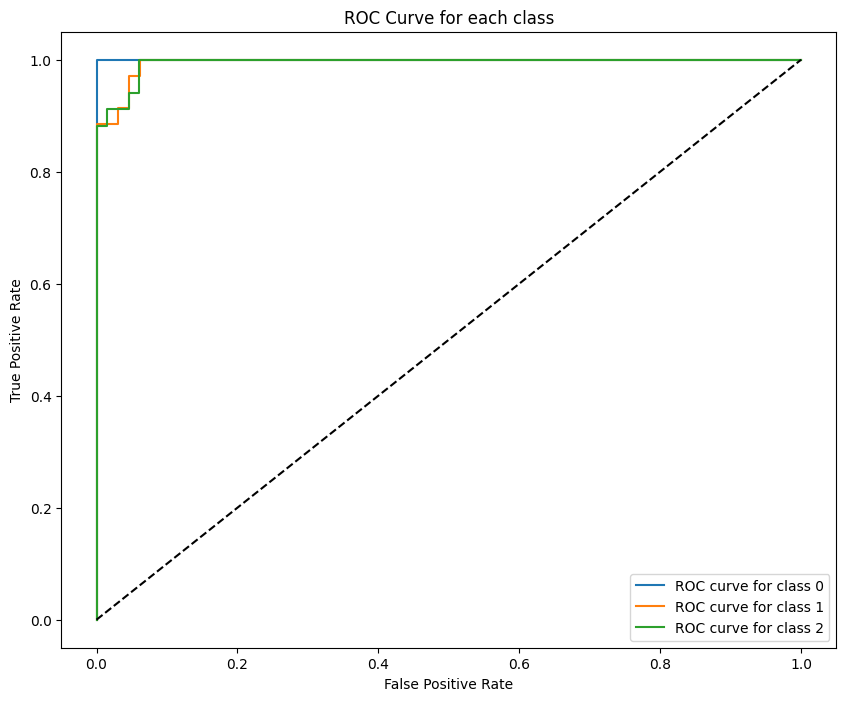

In [23]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

fpr = {}
tpr = {}
for i in range(len(model.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y_train == model.classes_[i], y_proba[:, i])

plt.figure(figsize=(10, 8))
for i in range(len(model.classes_)):
    plt.plot(fpr[i], tpr[i], label=f'ROC curve for class {model.classes_[i]}')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for each class')
plt.legend(loc='best')
plt.show()

In [29]:
index = y_train > 0

x_train_12 = x_train[index]
y_train_12 = y_train[index]

index = y_test > 0

x_test_12 = x_test[index]
y_test_12 = y_test[index]

In [86]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=0.01)

<Figure size 1000x1000 with 0 Axes>

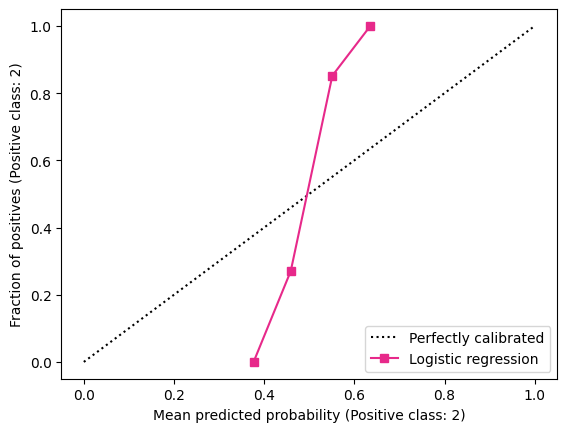

In [87]:
import matplotlib.pyplot as plt
from sklearn.calibration import CalibrationDisplay

fig = plt.figure(figsize=(10, 10))
colors = plt.get_cmap("Dark2")

lr.fit(x_train_12, y_train_12)
display = CalibrationDisplay.from_estimator(
    lr,
    x_test_12,
    y_test_12,
    n_bins=10,
    name="Logistic regression",
    color=colors(i),
);

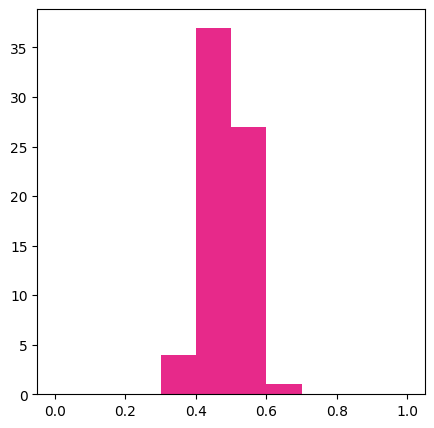

In [88]:
fig = plt.figure(figsize=(5, 5))
colors = plt.get_cmap("Dark2")

plt.hist(
    display.y_prob,
    range=(0, 1),
    bins=10,
    label="Logistic regression",
    color=colors(i),
);

In [89]:
from sklearn.metrics import brier_score_loss

brier_score = brier_score_loss(y_test_12, lr.predict_proba(X = x_test_12)[:, 1])

print(f"Brier score = {brier_score}")
print("")
print(classification_report(y_test_12, lr.predict(X = x_test_12)))

Brier score = 0.21013915332333347

              precision    recall  f1-score   support

           1       0.76      0.89      0.82        35
           2       0.86      0.71      0.77        34

    accuracy                           0.80        69
   macro avg       0.81      0.80      0.79        69
weighted avg       0.81      0.80      0.80        69



<Figure size 1000x1000 with 0 Axes>

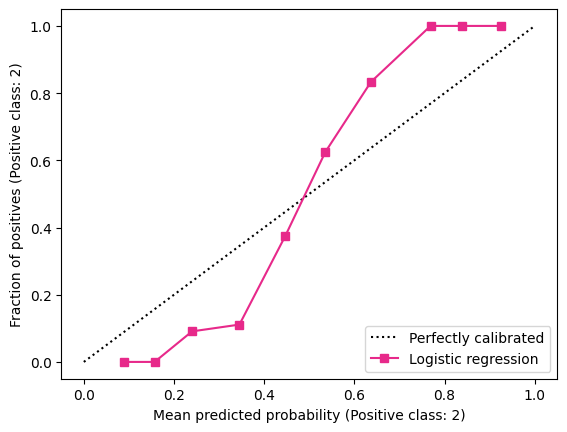

In [99]:
from sklearn.calibration import CalibratedClassifierCV

calibrated_lr = CalibratedClassifierCV(LogisticRegression(C=0.07), cv=10)

fig = plt.figure(figsize=(10, 10))
colors = plt.get_cmap("Dark2")

calibrated_lr.fit(x_train_12, y_train_12)
display = CalibrationDisplay.from_estimator(
    calibrated_lr,
    x_test_12,
    y_test_12,
    n_bins=10,
    name="Logistic regression",
    color=colors(i),
);

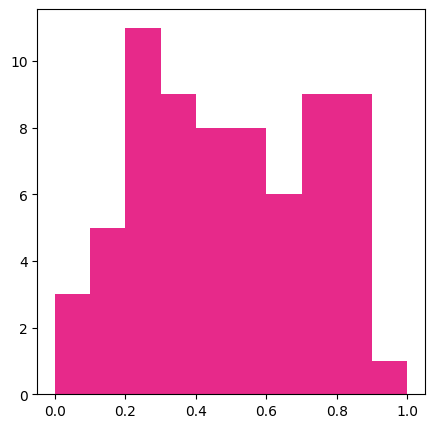

In [100]:
fig = plt.figure(figsize=(5, 5))
colors = plt.get_cmap("Dark2")

plt.hist(
    display.y_prob,
    range=(0, 1),
    bins=10,
    label="Logistic regression",
    color=colors(i),
);

In [101]:
brier_score = brier_score_loss(y_test_12, calibrated_lr.predict_proba(X = x_test_12)[:, 1])

print(f"Brier score = {brier_score}")
print("")
print(classification_report(y_test_12, calibrated_lr.predict(X = x_test_12)))

Brier score = 0.12001246052231909

              precision    recall  f1-score   support

           1       0.86      0.89      0.87        35
           2       0.88      0.85      0.87        34

    accuracy                           0.87        69
   macro avg       0.87      0.87      0.87        69
weighted avg       0.87      0.87      0.87        69



In [110]:
# Predicciones
y_proba = calibrated_lr.predict_proba(x_test_12)

roc_auc = roc_auc_score(y_test_12, y_proba[:, 1])
print('ROC AUC Score:', roc_auc)

ROC AUC Score: 0.9436974789915966


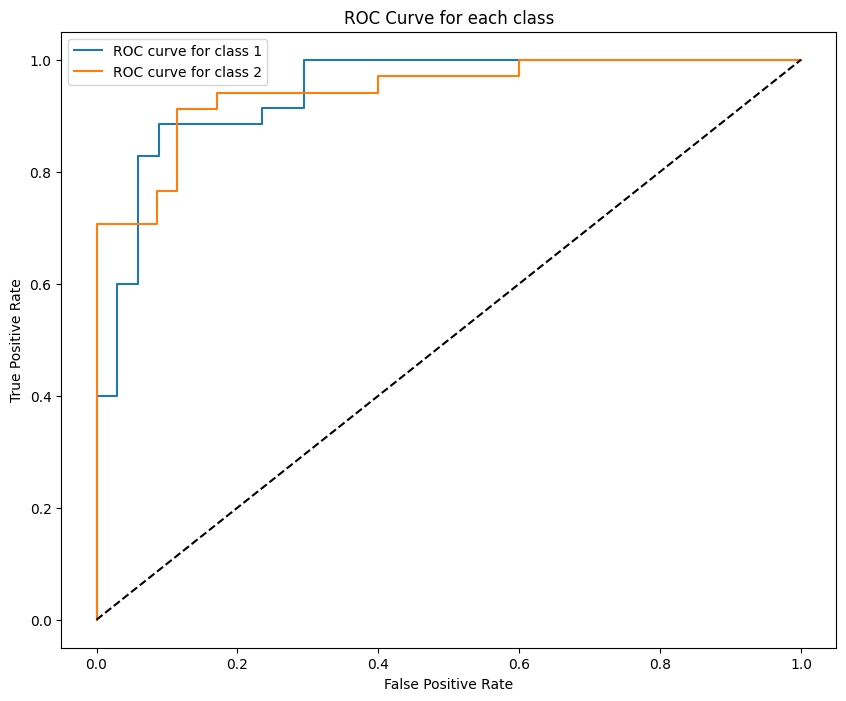

In [111]:
fpr = {}
tpr = {}
for i in range(len(calibrated_lr.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y_train_12 == calibrated_lr.classes_[i], y_proba[:, i])

plt.figure(figsize=(10, 8))
for i in range(len(calibrated_lr.classes_)):
    plt.plot(fpr[i], tpr[i], label=f'ROC curve for class {calibrated_lr.classes_[i]}')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for each class')
plt.legend(loc='best')
plt.show()